In [1]:
%load_ext autoreload
%autoreload 2

---

# Initialize

In [2]:
from nustar_planning.Planner import Target, Orbit, Planner, u, get_orbit_list

Obtain the list of available orbits during the time interval of interest.
***Be sure to check with Karl which orbits are available to you.***

In [3]:
window = get_orbit_list('2024-07-10 00:00:00', '2024-07-10 06:00:00')
print('Window orbits:')
for orbit in window:
    print(orbit)

Window orbits:
[<Time object: scale='utc' format='isot' value=2024-07-09T23:39:20.000>, <Time object: scale='utc' format='isot' value=2024-07-10T00:41:20.000>]
[<Time object: scale='utc' format='isot' value=2024-07-10T01:15:30.000>, <Time object: scale='utc' format='isot' value=2024-07-10T02:17:30.000>]
[<Time object: scale='utc' format='isot' value=2024-07-10T02:51:30.000>, <Time object: scale='utc' format='isot' value=2024-07-10T03:53:40.000>]
[<Time object: scale='utc' format='isot' value=2024-07-10T04:27:40.000>, <Time object: scale='utc' format='isot' value=2024-07-10T05:29:40.000>]


Create the `Planner` object to store all the orbit information.
Set the output directory to contain all generated products (plots and reports).
Orbits are given a defined time range (as provided by `get_orbit_list` command above and the *NuSTAR* people, e.g. Karl).
The targets are also given a time range, but the time range can be any subinterval within the orbit time range.
The subsequent projection plots and coordinate lists are generated with regards to the *coordinates at the mid-point of the target time range*.

In [19]:
planner = Planner('planner_example/')

# Define an orbit with a target

In [20]:
orbit1_time = window[0]
pois = [(-200, 250)]*u.arcsecond # points of interest

target1 = Target(
    target_id = 'Target 1',
    time_range = orbit1_time,
    center = (-150, -100)*u.arcsecond,
    fov = (-100, 0, 100)*u.arcsecond,
    angle = -15*u.degree,
    pois = pois,
    comments=(
        'This is a test.',
        'This is a second test.'
    )
)

orbit1 = Orbit(
    orbit_id = 'Orbit 1',
    time_range = orbit1_time,
    targets = [target1]
)

planner.add_orbit(orbit1)

# Make plots

You can plot the input information.

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

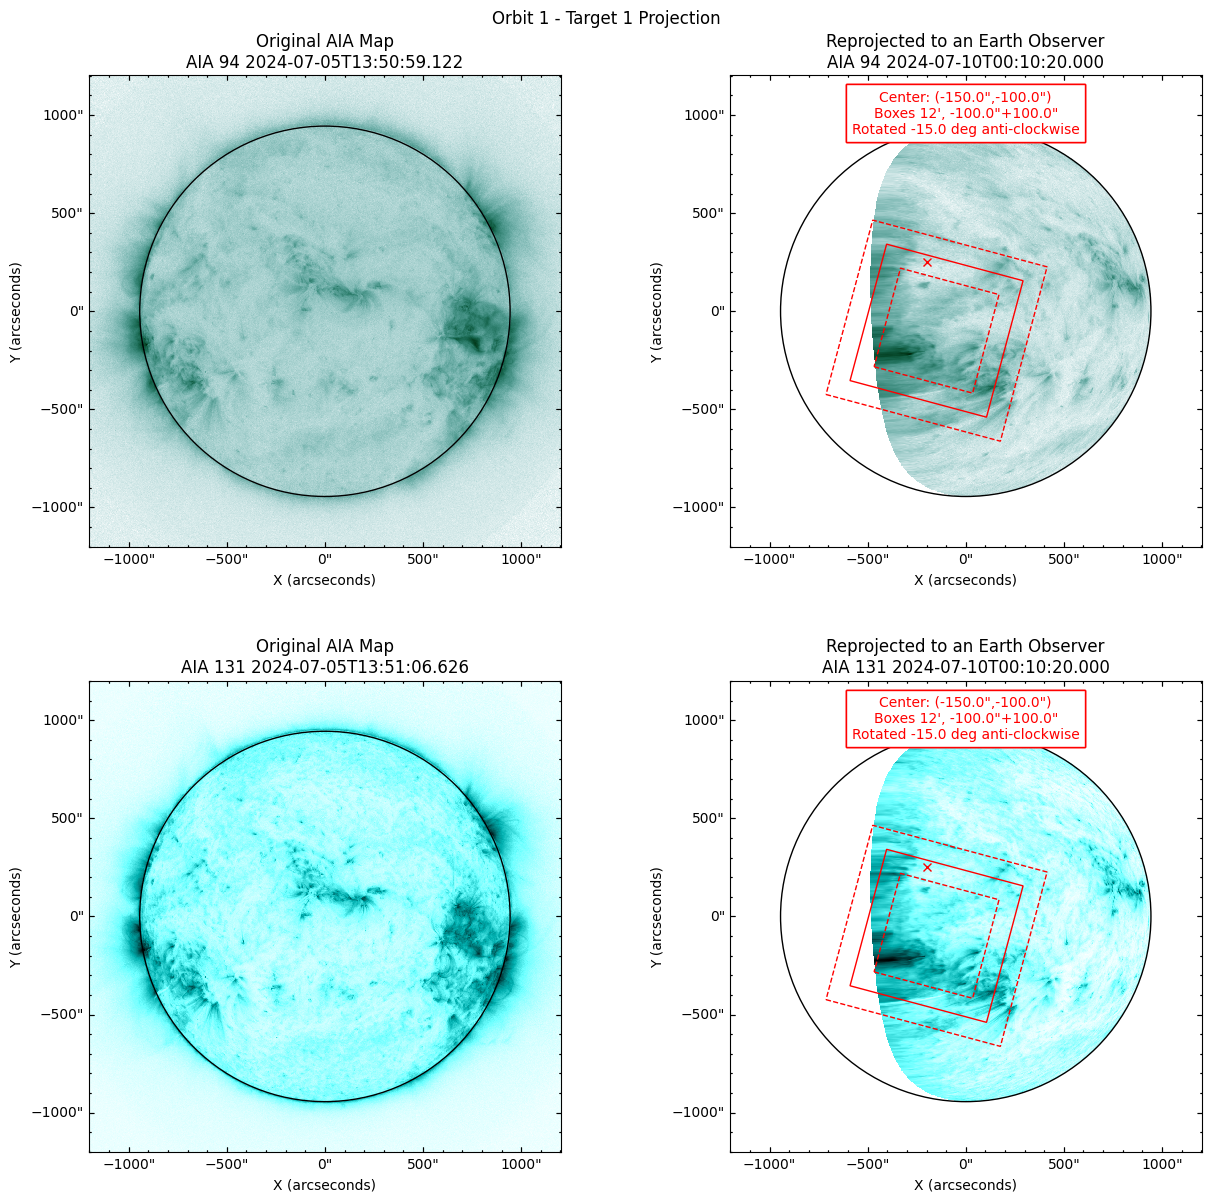

In [21]:
planner.plot_orbits()

# Report generation

You can generate a PDF report of the input information.
The PDF is compiled using LaTeX, and it will only work if it is locally available.

In [22]:
planner.generate_report()

sh: 1: module: not found


This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode

(/home/reed/Documents/research/software/nustar_planning/examples/planner_exampl
e//planner_example.tex
LaTeX2e <2022-06-01> patch level 5
L3 programming layer <2022-10-26>
(/home/reed/.local/lib/python3.12/site-packages/nustar_planning/templates/plann
ing.cls (/usr/local/texlive/2022/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/l3backend/l3backend-pdftex.def)))
 (/usr/local/texlive/2022/texmf-dist/tex/latex/titlesec/titlesec.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/graphicx.sty
(/usr/local/texlive/2022/texmf-dist/te

# Timetable

You can also print a timetable giving the orbit times and coordinates.
This is the finalized information that is sent to Karl.

In [23]:
planner.generate_timetable()

For a "square" field of view, use angle = 0 / 90 / 180 / 270 to have DET0 at the NE (top left) / SE / SW / NW
corners of a square field of view.

Orbit: 0
Orbit start: 2024-07-09T23:39:20.000 -> Orbit end: 2024-07-10T00:41:20.000
Aim time: 2024-07-10T00:10:20.000 RA: 109.45523345548396 deg, Dec: 22.209428657721663 deg
Roll: 346.575306471611 deg






